In [31]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 45
min later the temperature is 80$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [32]:
del_t = .75
T2 = 80
T1 = 85
Ta = 65
dTdt = (T2 - T1) / del_t     # F/hr                 
K = (-1 * dTdt) / (T1 - Ta)  # 1/hr

print(f"K is approximately {round(K,3)} 1/hr")

K is approximately 0.333 1/hr


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [33]:
def find_K(T1 = 85,
           T2 = 80,
           del_t = 45/60,
           Ta = 65):
    '''
    Function takes in 4 inputs: Starting temp, temp after time elapsed, time interval, and ambient temp (in that order)
    Returns the approximate value of the convective coefficient found by finite difference approximation
    '''
    dTdt = (T2 - T1) / del_t     # F/hr                 
    K = (-1 * dTdt) / (T1 - Ta)  # 1/hr
    return K
find_K()

0.33333333333333337

3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

In [34]:
def analytical(Ta=65, T0=85, K=.33333, t=[1]):
    '''
    Function takes 4 inputs: Ambient temp, Starting temp, K, and time
    Returns the analytical solution defined above for every time in list t
    '''
    return Ta + (T0 - Ta)*np.exp(-1*K*t)
    
def dTdt(K,T,Ta):
    '''
    Function to be called by euler_integration() defined below
    Takes 3 inputs: K, current temperature, ambient temperature
    Returns the equation for dT/dt defined above
    '''
    return -1*K*(T-Ta)

def euler_integration(K=.333, T0=85, Ta=65, t_final=36,del_t=1):
    '''
    Function performs Euler Integration approximation for a given set of time and given time steps
    Takes 5 inputs: K, starting temp, ambient temp, the final time to integrate to, the difference to use between time steps
    Returns a tuple of all the time steps that the function created and the euler interated values
    '''
    times = np.arange(0, t_final+del_t, del_t)
    T_values = [T0]
    
    for t in times[:-1]:  # Exclude the last time point
        T_next = T_values[-1] + del_t * dTdt(K, T_values[-1],Ta)
        T_values.append(T_next)
        
    return times, T_values

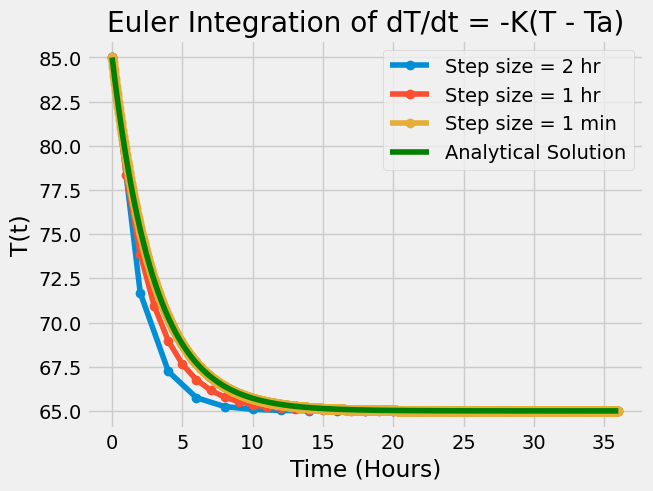

In [35]:
times_analytical = np.arange(0,36,.001)
analytical_sol = analytical(t=times_analytical)
times_2hr, T_values_2hr = euler_integration(del_t=2)
times_1hr, T_values_1hr = euler_integration()
times_1min, T_values_1min = euler_integration(del_t=1/60)

plt.plot(times_2hr, T_values_2hr,'o-', label='Step size = 2 hr' )
plt.plot(times_1hr, T_values_1hr,'o-', label='Step size = 1 hr' )
plt.plot(times_1min, T_values_1min,'o-', label='Step size = 1 min')
plt.plot(times_analytical, analytical_sol, 'g-', label='Analytical Solution')
plt.xlabel('Time (Hours)')
plt.ylabel('T(t)')
plt.title('Euler Integration of dT/dt = -K(T - Ta)')
plt.legend()
plt.grid(True)
plt.show()

# Part 3A
As shown in the graph above, by decreasing the time step, the euler approximation does converge to the analytical solution

# Part 3B

In [36]:
T_final = analytical(t=np.inf)
print(f"As time approaches infinity, the final temperature the corpse reaches is: {T_final}F")

As time approaches infinity, the final temperature the corpse reaches is: 65.0F


# Part 3c

In [43]:
# Solve above equation to find time of death (TOD) relative to time discovered
T = 98.6
Ta = 65
T0 = 85
K = .33333

TOD = np.log((T-Ta)/(T0-Ta))/(-1*K)
print(f"The person was killed {round(-1*TOD,3)} hours before the corpse was discovered")

The person was killed 1.556 hours before the corpse was discovered
